# Titanic Datset

## Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
titanic = pd.read_csv('titanic-Dataset.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


In [12]:
titanic.groupby(titanic["Sex"])[["Fare","Age"]].mean()

,Fare,Age
Sex,,
female,44.479818,27.915709
male,25.523893,30.726645


## Data Visualization

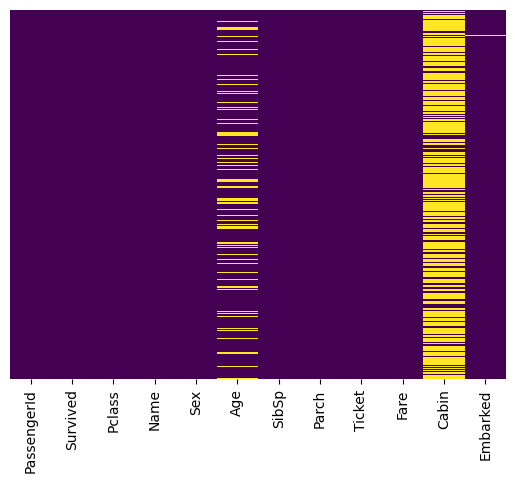

In [14]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

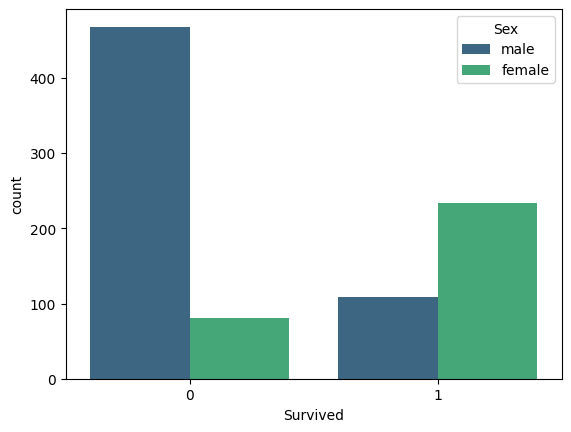

In [15]:
sns.countplot(x='Survived', data = titanic, palette = 'viridis', hue = 'Sex')
plt.show()

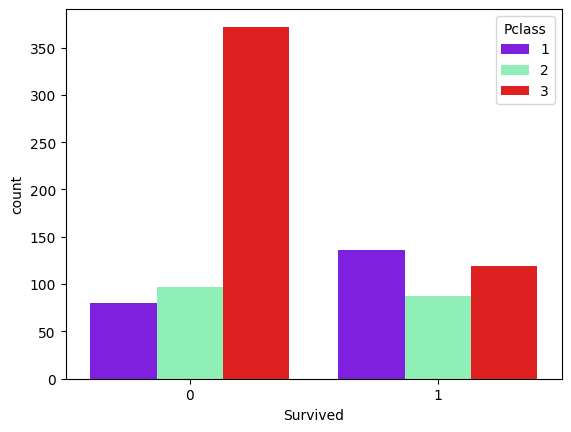

In [16]:

sns.countplot(x='Survived', data = titanic, palette = 'rainbow', hue = 'Pclass')
plt.show()

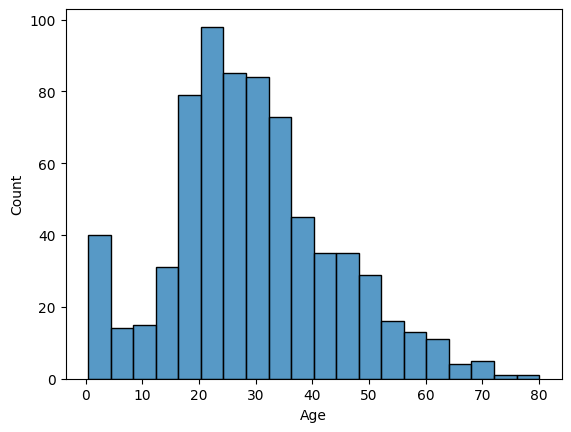

In [17]:
sns.histplot(titanic['Age'].dropna(), kde=False, bins=20)
plt.show()

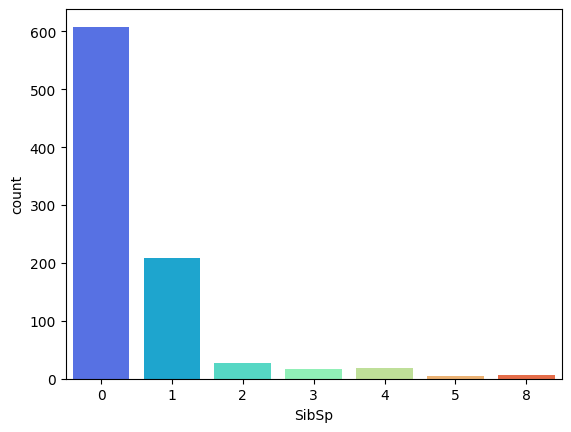

In [18]:
sns.countplot(x='SibSp', data = titanic, palette = 'rainbow')
plt.show()

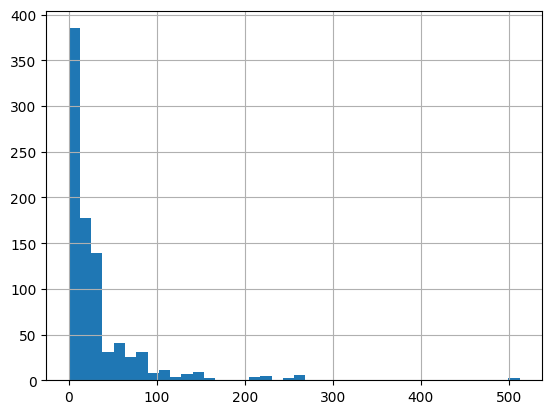

In [19]:
titanic['Fare'].hist(bins=40 )
plt.show()

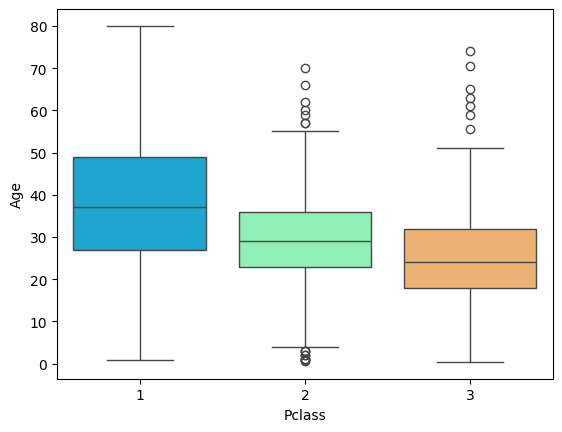

In [20]:
sns.boxplot(x='Pclass', y='Age', data = titanic, palette='rainbow')
plt.show()

In [21]:
# This was added latter on after the recommendation
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass ==1:
            return(37)
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis = 1 )

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


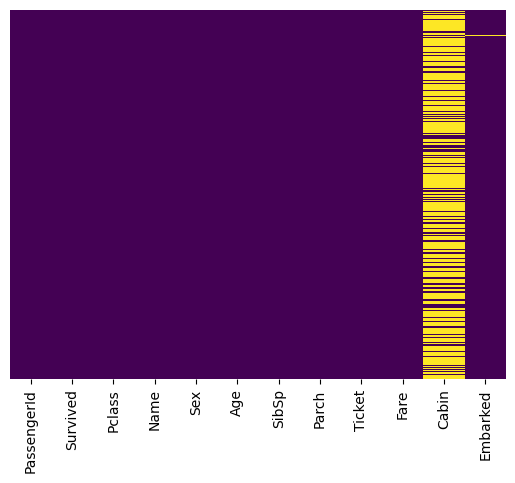

In [24]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [25]:
titanic.drop('Cabin', axis = 1 , inplace = True)

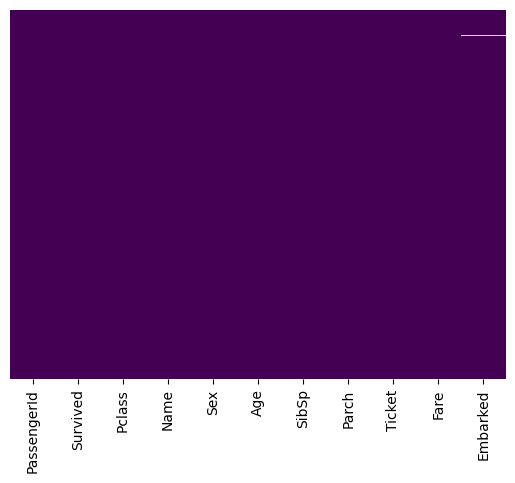

In [26]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

## Using get_dummies

In [28]:
sex = pd.get_dummies(titanic['Sex'],dtype='int64', drop_first=True)

In [29]:
embark = pd.get_dummies(titanic['Embarked'], dtype='int64', drop_first=True)

In [30]:
titanic = pd.concat([titanic, sex,embark], axis = 1 )

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [32]:
titanic.drop(['Sex','Embarked','Ticket'],axis = 1, inplace = True )
titanic.drop("Name", inplace = True, axis =1 )

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
titanic.drop(['PassengerId'], axis = 1, inplace = True )

In [35]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    int64  
 7   Q         891 non-null    int64  
 8   S         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


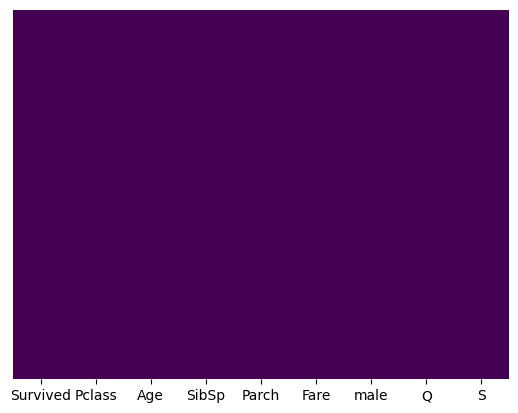

In [37]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [38]:
corr = titanic.corr().round(2)

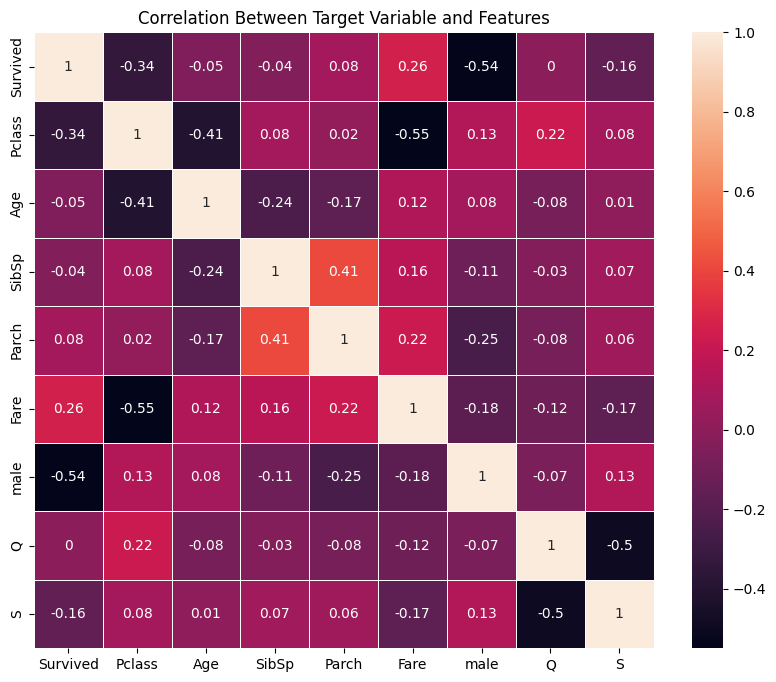

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True,linewidths=0.5)
plt.title("Correlation Between Target Variable and Features")
plt.show()

# Train_test_Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
X = titanic.drop('Survived', axis =1)
y= titanic['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=101)

In [45]:
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [46]:
print(len(X_train))
print(len(y_train))

596
596


# Logistic Regression

In [48]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       169
           1       0.81      0.69      0.75       126

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
conf = confusion_matrix(y_test, predictions)

In [55]:
conf

array([[149,  20],
       [ 39,  87]])

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [156]:
model = LogisticRegression()

param_grid = {
   'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg']  # Solver options
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 1, 'solver': 'lbfgs'}
Best score: 0.8104061624649861


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       169
           1       0.81      0.69      0.75       126

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



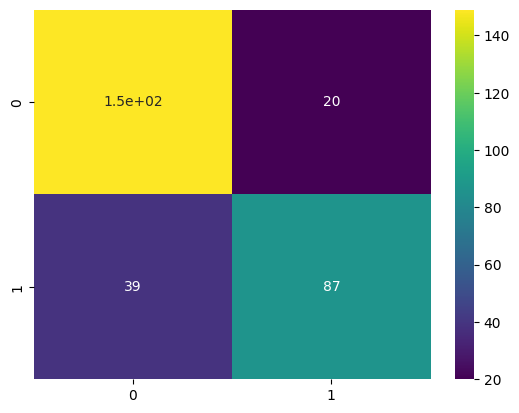

In [60]:
sns.heatmap(conf,cmap='viridis', annot = True)
plt.show()

## Comparing Actual vs Predicted Values

In [62]:
#  comparing actual vs predicted values
actual_values_vs_predicted_values = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions
})

print(actual_values_vs_predicted_values.head(100))

    Actual  Predicted
0        0          0
1        1          1
2        0          1
3        1          0
4        0          0
..     ...        ...
95       1          1
96       1          1
97       0          0
98       0          0
99       1          0

[100 rows x 2 columns]


# Using Other Models

## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
tree = DecisionTreeClassifier()

In [67]:
model = tree.fit(X_train,y_train)

In [68]:
prediction = model.predict(X_test)

In [69]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       169
           1       0.75      0.63      0.69       126

    accuracy                           0.75       295
   macro avg       0.75      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 10,15,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.8255042016806723


## Using GridSearch CV

In [73]:
tree1 = DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)

In [74]:
model = tree1.fit(X_train,y_train) 

In [75]:
predictions = model.predict(X_test)

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       169
           1       0.78      0.75      0.76       126

    accuracy                           0.80       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.80      0.80      0.80       295



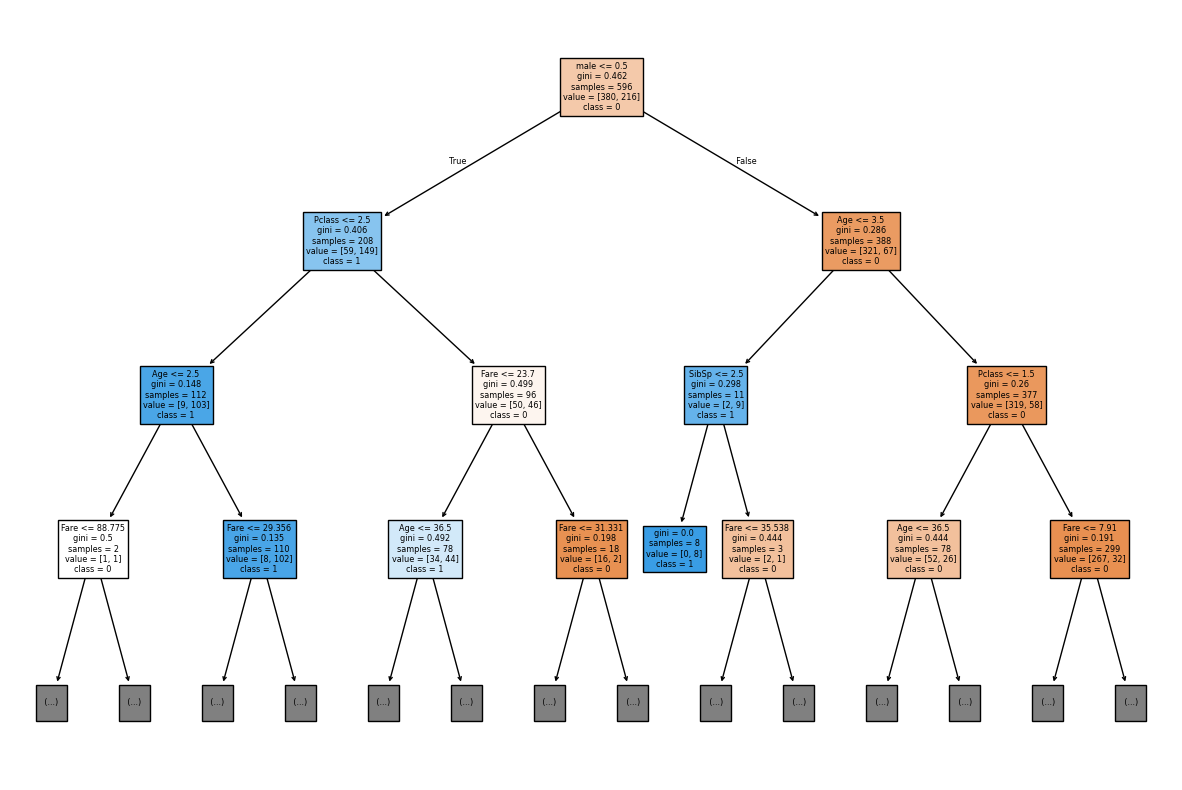

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['0', '1'], max_depth = 3)
plt.show()

In [78]:
#  comparing actual vs predicted values
actual_value_vs_predicted_value = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions
})
print(actual_values_vs_predicted_values.head(100))

    Actual  Predicted
0        0          0
1        1          1
2        0          1
3        1          0
4        0          0
..     ...        ...
95       1          1
96       1          1
97       0          0
98       0          0
99       1          0

[100 rows x 2 columns]


In [79]:
import joblib
joblib.dump(logmodel, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']